<a href="https://colab.research.google.com/github/stefandanielachirei/licenta_2023_Ceica_Sergiu/blob/main/WiDS_Datathon%2B%2B_starter_code_2nd_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Overview
Welcome to the Kaggle WiDS Datathon++ Starter Notebook! This notebook is designed to help all the aspiring data scientists kickstart their journey in data analysis, machine learning, and data-driven decision-making. Whether you're new to the world of data science or looking to sharpen your skills, this resource will guide you through the process of tackling the WiDS Datathon++ competition, a real-world data challenge.

In [1]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


### Loading Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import category_encoders as ce

### Reading Dataset

In [3]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
print(train_data.shape)
print(test_data.shape)

(27674, 83)
(11845, 82)


In [4]:
# Display the first few rows of the training dataset
train_data.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,treatment_pd
0,994155,Asian,COMMERCIAL,CA,917,46,F,27.0,C50811,Malignant neoplasm of ovrlp sites of right fem...,...,18.858696,11.426087,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,35
1,154389,NaN,MEDICARE ADVANTAGE,OH,451,63,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,0.255319,2.234043,1.182979,18.317021,13.546809,0.146809,31.890909,7.631915,9.631915,33
2,387343,NaN,COMMERCIAL,TX,773,53,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,3.588679,7.915094,21.064151,14.083019,11.943396,2.549057,32.556250,16.396226,10.392453,24
3,921275,Hispanic,MEDICAID,CA,928,50,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,455
4,803454,NaN,COMMERCIAL,NY,112,39,F,18.0,1749,"Malignant neoplasm of breast (female), unspeci...",...,9.184211,6.089474,18.960526,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,162


### Data Exploration and Visualization

You can explore the data visually to gain insights into the dataset

Univariate Analysis:

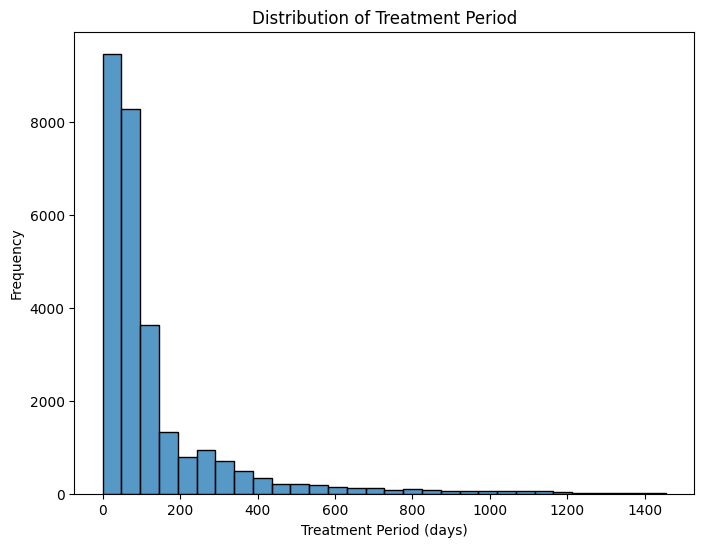

In [5]:
# Plot a histogram of the 'treatment_pd' target variable
plt.figure(figsize=(8, 6))
sns.histplot(train_data['treatment_pd'], bins=30)
plt.xlabel('Treatment Period (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Treatment Period')
plt.show()

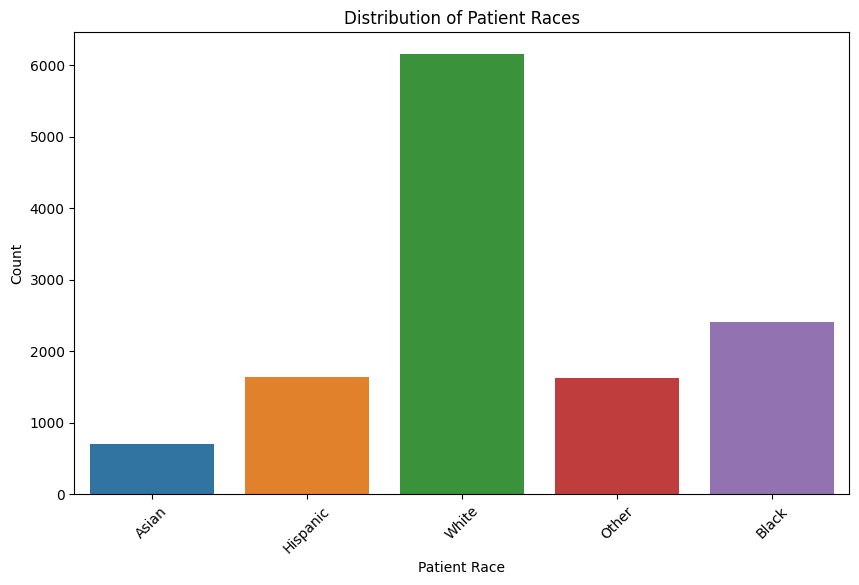

In [6]:
# Bar Plot for Categorical Variables (e.g., patient_race)
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='patient_race')
plt.title("Distribution of Patient Races")
plt.xlabel("Patient Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

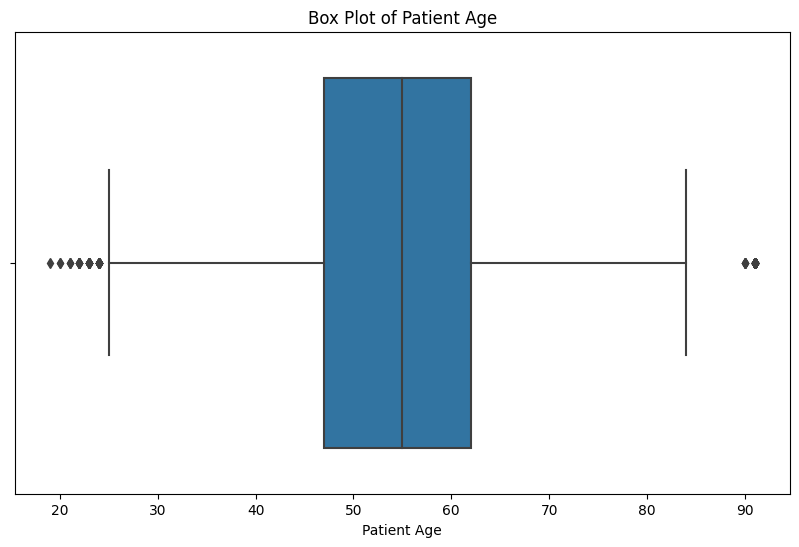

In [7]:
# Box Plot for Numeric Variables (e.g., patient_age)
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='patient_age')
plt.title("Box Plot of Patient Age")
plt.xlabel("Patient Age")
plt.show()

Bivariate Analysis:

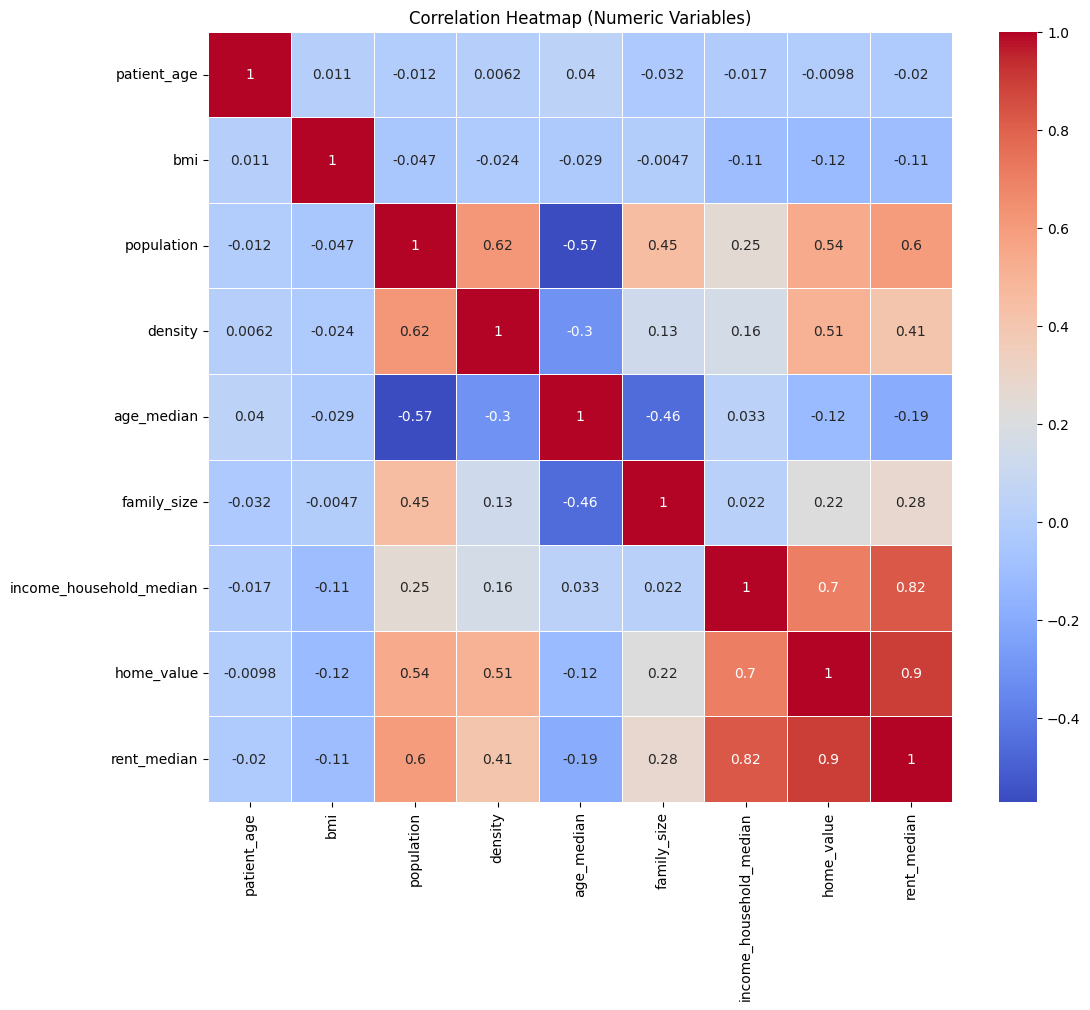

In [8]:
# Correlation Heatmap (for numeric variables)
numeric_columns = ['patient_age', 'bmi', 'population', 'density', 'age_median', 'family_size', 'income_household_median', 'home_value', 'rent_median']
correlation_matrix = train_data[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()


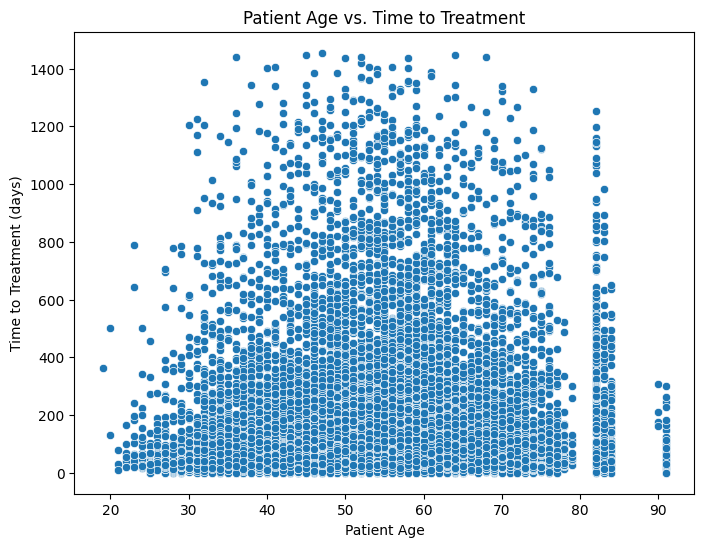

In [9]:
# Scatter Plot for Relationship: Patient Age vs. Time to Treatment
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_data, x='patient_age', y='treatment_pd')
plt.title("Patient Age vs. Time to Treatment")
plt.xlabel("Patient Age")
plt.ylabel("Time to Treatment (days)")
plt.show()

#### Statistical Visualizations using Seaborn:


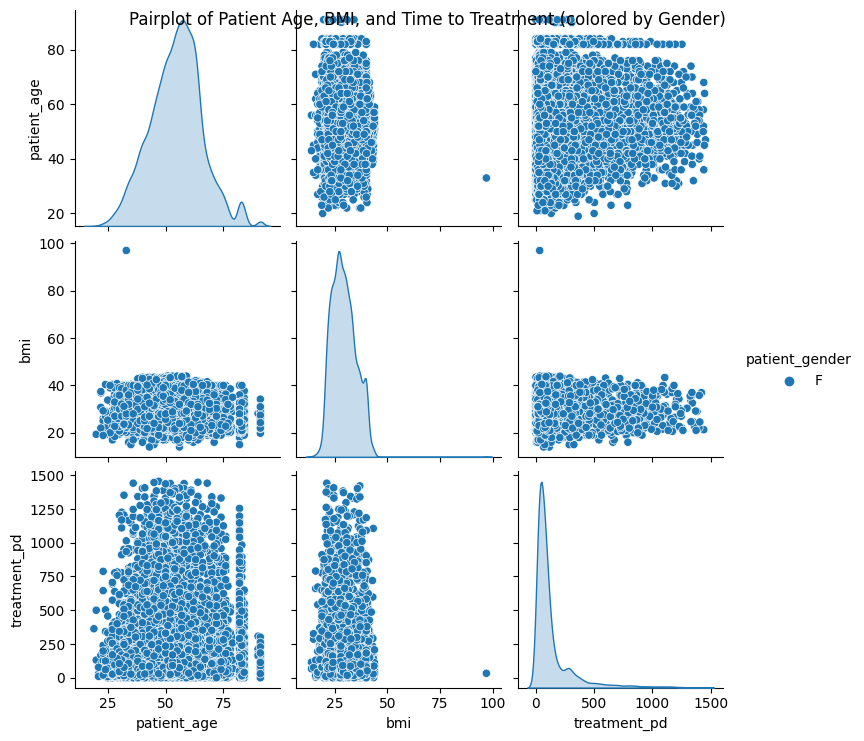

In [10]:
# Pairplot with hue (e.g., patient_gender)
sns.pairplot(train_data, vars=['patient_age', 'bmi', 'treatment_pd'], hue='patient_gender')
plt.suptitle("Pairplot of Patient Age, BMI, and Time to Treatment (colored by Gender)")
plt.show()


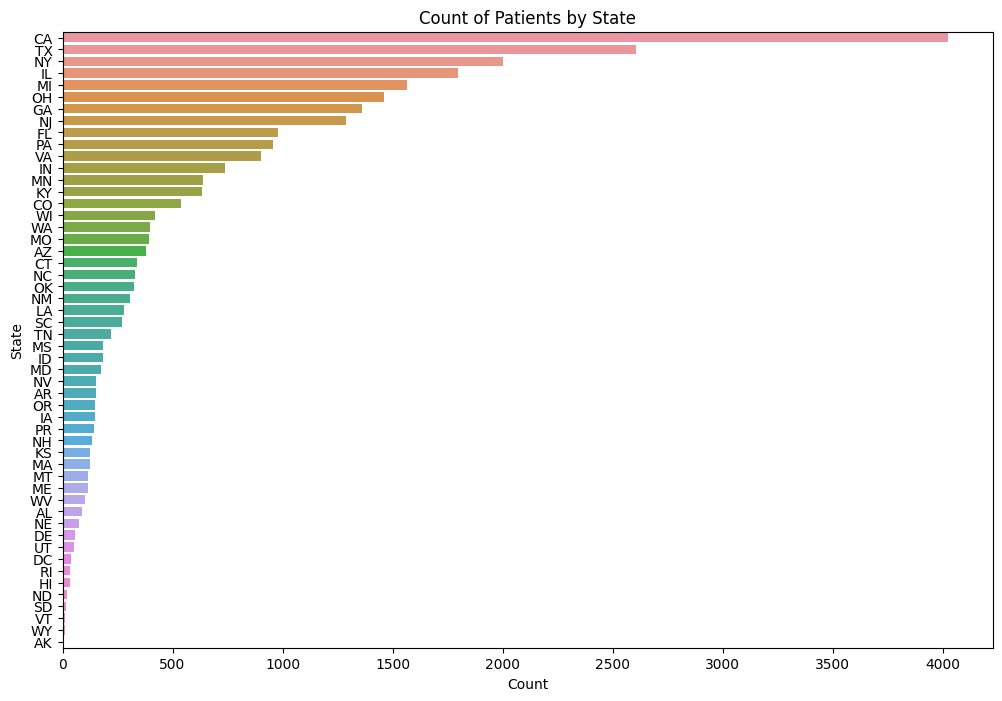

In [11]:
# Count Plot (e.g., patient_state)
plt.figure(figsize=(12, 8))
sns.countplot(data=train_data, y='patient_state', order=train_data['patient_state'].value_counts().index)
plt.title("Count of Patients by State")
plt.xlabel("Count")
plt.ylabel("State")
plt.show()

### Feature Engineering

In [12]:
# You can create new features or transform existing ones for better model performance
# Example: Calculate age at the time of diagnosis
train_data['age_at_diagnosis'] = train_data['patient_age'] - (train_data['breast_cancer_diagnosis_year'] - 2018)

### Split the data into features and target variable

In [13]:
X = train_data.drop(['treatment_pd'], axis=1)
y = train_data['treatment_pd']


In [14]:
# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(exclude=['object']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

### Feature Imputation

It is very important to handle missing values. Therefore think of best possible way for imputation

In [15]:
# Impute missing values for numerical columns with the median
numerical_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = numerical_imputer.fit_transform(X[numerical_cols])

# Impute missing values for categorical columns with the mode (most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])


Note:
there are some categories in the train data that are not present in the test data. To address this issue, you can use the CategoryEncoders library, this works well then sklearn's OneHotEncoder in this case

### Categorical Encoding/ Binning

You have to think about it well and need to see what kind of encoding techniques be used for different variables

In [16]:
# One-Hot Encode Categorical Columns using scikit-learn's CategoryEncoder
ohe = ce.OneHotEncoder(cols=categorical_cols, drop_invariant=True)
#ohe = OneHotEncoder(drop='first', sparse=False)
X_encoded = ohe.fit_transform(X[categorical_cols])
X_encoded1 = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out(input_features=categorical_cols))

X = pd.concat([X[numerical_cols], X_encoded1], axis=1)

### Train Test Split

In [17]:
X_train, X_valid,y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalisation

You can scale or preprocess the features as needed

In [18]:
# Example: Standardize numerical features
scaler = StandardScaler()
X_train[['age_at_diagnosis', 'bmi']] = scaler.fit_transform(X_train[['age_at_diagnosis', 'bmi']])
X_valid[['age_at_diagnosis', 'bmi']] = scaler.transform(X_valid[['age_at_diagnosis', 'bmi']])


### Feature Selection techniques

#### You can try different techniques. Few of the examples are:
Codes for removal variables having multicolinearity
```
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif = calculate_vif(X_train)
```
Feature Importance from Tree-Based Models:
```
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest model to estimate feature importance
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Select the top k features based on importance scores
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
```
Lasso
```
from sklearn.linear_model import Lasso

# Fit a Lasso model with different alpha values
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Select non-zero coefficient features
selected_features = X_train.columns[lasso.coef_ != 0]
```
PCA
```
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
```

### Model Building

Try different regression models. You can keep the linearRegression as your baseline Model

In [19]:
# Model Selection and Training
# Choose a model and train it on the data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Prediction

Make predictions on the validation set

In [20]:
y_pred = model.predict(X_valid)

### Model Evaluation

In [21]:
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 144.05930075595663


### Validation Data

#### Model Selection and Inference on Test Data
You can select a different model or continue with the chosen model. Once you are satisfied with the model, make predictions on the test dataset

In [22]:
test_data['age_at_diagnosis'] = test_data['patient_age'] - (test_data['breast_cancer_diagnosis_year'] - 2018)

#imputation
test_data[numerical_cols] = numerical_imputer.transform(test_data[numerical_cols])
test_data[categorical_cols] = categorical_imputer.transform(test_data[categorical_cols])

#One-Hot Encode Categorical Columns using scikit-learn's OneHotEncoder
test_encoded = ohe.transform(test_data[categorical_cols])
test_encoded = pd.DataFrame(test_encoded, columns=ohe.get_feature_names_out(input_features=categorical_cols))

# Merge one-hot encoded categorical columns with numerical columns for the test dataset
test_data = pd.concat([test_data[numerical_cols], test_encoded], axis=1)

test_data[['age_at_diagnosis', 'bmi']] = scaler.transform(test_data[['age_at_diagnosis', 'bmi']])

In [23]:
test_predictions = model.predict(test_data)

### Additional tips

1. You should also check the directions of coefficients of different variables and see if they make sense
2. Removing columns having high p values (0.05)
3. Check for monotonicity where ever applicable
4. You can also try binning some variables after looking at the distribution well.
5. Please refer this documentation for encoding - https://contrib.scikit-learn.org/category_encoders/
6. For scaling the variables you can try different scaling techniques - StandardScalar, minMaxScalar etc.
7. You dont need to scale data when you use tree based algorithm.